<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER7%20%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. K-평균 알고리즘 이해**

**K-평균**은 군집화에서 가장 일반적으로 사용되는 알고리즘입니다. 군집 중심점(센트로이드)이라는 특정한 임의 지점을 선택하여 해당 중심에 가장 가까운 포인트들을 선택합니다. 알고리즘 원리에 대한 설명은 본서와 [링크](https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)를 참고하시기 바랍니다.

K-평균의 장점은 쉽고 간결합니다. 단점은 세 가지가 있습니다. 첫째, 거리 기반 알고리즘이므로 피처 개수가 많으면 군집화 정확도가 떨어지므로 PCA로 차원 감소를 적용해야 할 수 있습니다. 둘째, 반복 횟수가 많으면 수행 시간이 매우 느려집니다. 셋째, 군집 개수를 선택할 때 가이드하기 어렵습니다. 


## **1.1. 사이킷런 KMeans 클래스 소개**

In [1]:
from sklearn.cluster import KMeans

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

`KMeans` 클래스의 주요 파라미터는 아래와 같습니다.

- `n_clusters`: 군집화할 개수(센트로이드 개수)입니다.

- `init`: 초기에 센트로이드 좌표를 설정할 방식입니다. 일반적으로 `'k-means++'`를 사용하며 디폴트입니다.

- `max_iter`: 최대 반복 횟수입니다. 이 횟수 이전에 모든 센트로이드의 이동이 없으면 종료합니다.

주요 속성은 아래와 같습니다.

- `labels_`: 각 데이터 포인트가 속한 센트로이드 레이블입니다.

- `cluster_centers_`: 각 센트로이드 좌표입니다. 센트로이드 좌표 시각화에 사용됩니다.

## **1.2. K-평균을 이용한 붓꽃 데이터 세트 군집화**

붓꽃 데이터를 준비하겠습니다.

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',
                                               'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


군집화를 수행하고 각 데이터 포인트가 어떤 센트로이드에 속하는지 확인해 보겠습니다.

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


타깃값과 클러스터 값 개수를 확인해 보겠습니다.

In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


타깃 0을 제외한 두 타깃은 클러스터 0과 2로 분산됐습니다.

붓꽃 데이터 세트의 군집화를 시각화해 보겠습니다.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


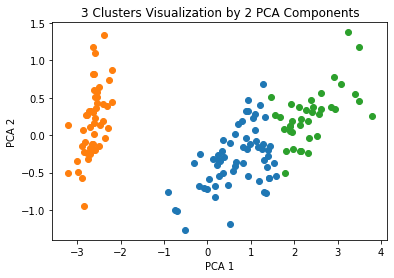

In [15]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'],
            marker='o', )
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'],
            marker='o')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'],
            marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

오른쪽 두 피처는 분리된 정도가 주황색 피처보다 덜합니다. 

## **1.3. 군집화 알고리즘 테스트를 위한 데이터 생성**



---

정리 중

---



# **2. 군집 평가(Cluster Evaluation)**

## **2.1. 실루엣 분석의 개요**

## **2.2. 붓꽃 데이터 세트를 이용한 군집 평가**

## **2.3. 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

# **3. 평균 이동**

## **3.1. 평균 이동(Mean shift)의 개요**

# **4. GMM(Gaussian Mixture Model)**

## **4.1. GMM 소개**

## **4.2. GMM을 이용한 붓꽃 데이터 세트 군집화**

## **4.3. GMM과 K-평균의 비교**

# **5. DBSCAN**

## **5.1. DBSCAN 개요**

## **5.2. DBSCAN 적용하기 - 붓꽃 데이터 세트**

## **5.3. DBSCAN 적용하기 - make_circles() 데이터 세트**

# **6. 군집화 실습 - 고객 세그먼테이션**

## **6.1. 데이터 세트 로딩과 데이터 클렌징**

## **6.2. RFM 기반 데이터 가공**

## **6.3. RFM 기반 고객 세그먼테이션**

# **7. 정리**